## Analysing Mallow's phi vs data generation eta

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def count_swaps(N, eta):
    c = 0
    for i in range(1, N):
        for j in range(i, 0, -1):
            if eta >= np.random.uniform(0.0,1.0):
                c += 1
    return c

print(count_swaps(100, (2.0/3.0)))

3326


In [22]:
def analysis(num_iters, N_min, N_max, N_inc, eta):
    out = []
    for N in range(N_min, N_max+1, N_inc):
        this_N = []
        for _ in range(num_iters):
            this_N.append(count_swaps(N, eta) * 1.0)
        out.append((N, np.sum(this_N) / (num_iters)))
    return out

print(analysis(10, 10, 20, 1,  0.5))

[(10, 21.8), (11, 27.0), (12, 30.5), (13, 39.5), (14, 48.0), (15, 49.7), (16, 60.0), (17, 65.1), (18, 76.4), (19, 86.1), (20, 96.6)]


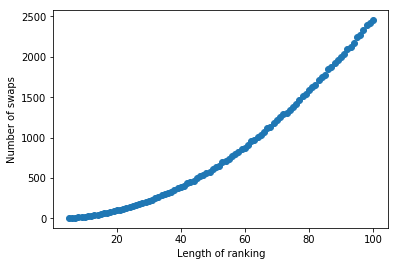

In [23]:
%matplotlib inline

x, y = zip(*analysis(num_iters=10, N_min=5, N_max=100, N_inc=1, eta=0.5))
plt.scatter(x,y)
plt.xlabel('Length of ranking')
plt.ylabel('Number of swaps')
plt.show()

I think I was looking at things wrong. Say we have a 2/3 chance to swap. Our expected series is S = 2/3 + 4/9 + 8/27 + ...; If we multiply this by 2/3, we get (2/3)S = 4/9 + 8/27 + 16/81 + ...; which is 2/3 less than S. 
* S - (2/3)S = 2/3
* (1/3)S = 2/3
* S = 2

So as N -> inf, the expected number of swaps approaches 2(N-1) (2 swaps per iteration, except we dont swap when there is only 1 element)